In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def parser(s, pattern_str):
    pattern = re.compile(pattern_str)
#     print(s)
    mo = pattern.search(s)
    return mo
def read_log(tag, fixed = 1):
# tag = 'baseline'
    filename = f'~/labshare/UKB/ptrs-tf/models/cnnPTRS/{tag}.log'
    logfile = f'temp.{tag}.log'
    !cat {filename} |grep Epoch > temp.{tag}.log
    out_dic = {
        'epoch_counter': [],
        'epoch': [],
        'loss': [],
        'valid_accuracy': [],
        'valid_accuracy_x': [],
        'insample_accuracy_x': []
    }
    if fixed == 1:
        pattern_str = 'Epoch (\d+) : loss (-?[\d\.e-]+) ; validation-accuracy: (-?[\d\.e-]+) ; validation-accurary-x (-?[\d\.e-]+) ; insample-accuracy-x (-?[\d\.e-]+)'
    elif fixed == 2:
        pattern_str = 'Epoch (\d+) : loss (-?[\d\.e-]+) : agg loss (-?[\d\.e-]+) ; validation-accuracy: (-?[\d\.e-]+) ; validation-accurary-x (-?[\d\.e-]+) ; insample-accuracy-x (-?[\d\.e-]+)'
        out_dic['loss_fixed'] = []
    elif fixed == 3:
        pattern_str = 'Epoch (\d+) : loss_insample (-?[\d\.e-]+) : loss_valid (-?[\d\.e-]+) : agg loss (-?[\d\.e-]+) ; validation-accuracy: (-?[\d\.e-]+) ; validation-accurary-x (-?[\d\.e-]+) ; insample-accuracy-x (-?[\d\.e-]+)'
        out_dic['loss_insample'] = []
        out_dic['loss_valid'] = []
    epochs = []
    losses = []
    valid_acces = []
    valid_accu_xes = []
    insample_accu_xes = []
    epoch_counter = 0
    with open(logfile, 'r') as f:
        for i in f:
            epoch_counter += 1
            e = parser(i, pattern_str = pattern_str).groups()
            if fixed == 1:
                epoch, loss, valid_acc, valid_accu_x, insample_accu_x = [ float(h) for h in e ]
            elif fixed == 2:
                epoch, loss, loss_fixed, valid_acc, valid_accu_x, insample_accu_x = [ float(h) for h in e ]
            elif fixed == 3:
                epoch, loss_insample, loss_valid, loss, valid_acc, valid_accu_x, insample_accu_x = [ float(h) for h in e ]
            out_dic['epoch_counter'].append(epoch_counter)
            out_dic['epoch'].append(epoch)
            out_dic['loss'].append(loss)
            if fixed == 2:
                out_dic['loss_fixed'].append(loss_fixed) 
            elif fixed == 3:
                out_dic['loss_insample'].append(loss_insample)
                out_dic['loss_valid'].append(loss_valid)
#                 out_dic['agg_loss'].append(agg_loss)
            out_dic['valid_accuracy'].append(valid_acc)
            out_dic['valid_accuracy_x'].append(valid_accu_x)
            out_dic['insample_accuracy_x'].append(insample_accu_x)
    return pd.DataFrame(out_dic)
            

# Train on inverse normalized outcome

In [3]:
# tag = 'baseline'
out = None
tags = ['baseline', 'cnn_ptrs_1', 'mlp_ptrs_1', 'cnn_ptrs_2', 'mlp_ptrs_2']
types = ['loss', 'valid_accuracy', 'valid_accuracy_x', 'insample_accuracy_x']
for tag in tags:
    tmp = read_log(tag)
    tmp['tag'] = tag
    if out is None:
        out = tmp
    else:
        out = pd.concat([out, tmp])
# out

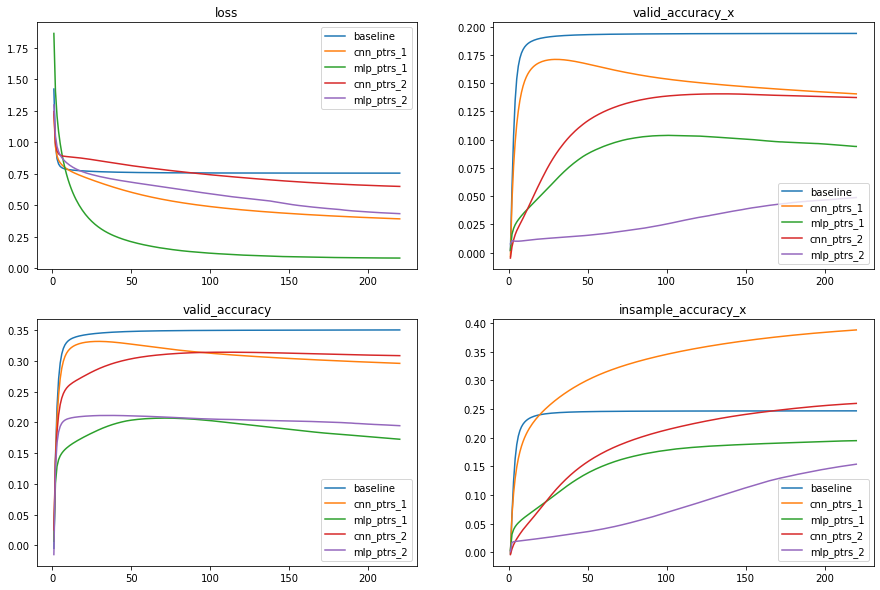

In [4]:
fig, aes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
for i in tags:
    tmp_ = out.loc[out['tag'] == i]
    for j in zip([0,0,1,1],[0,1,0,1]): 
        n = j[0] + j[1] * 2
        aes[j].plot(tmp_[['epoch_counter']], tmp_[types[n]], label = i)
        aes[j].legend()
        aes[j].set_title(types[n])

# Train on residual 

In [5]:
# tag = 'baseline'
out = None
tags = ['baseline-residual-mode', 'mlp_ptrs_1-residual-mode', 'cnn_ptrs_2-residual-mode', 'mlp_ptrs_2-residual-mode']  # , 'cnn_ptrs_1-residual-mode'
types = ['loss', 'valid_accuracy', 'valid_accuracy_x', 'insample_accuracy_x']
for tag in tags:
    tmp = read_log(tag)
    tmp['tag'] = tag
    if out is None:
        out = tmp
    else:
        out = pd.concat([out, tmp])

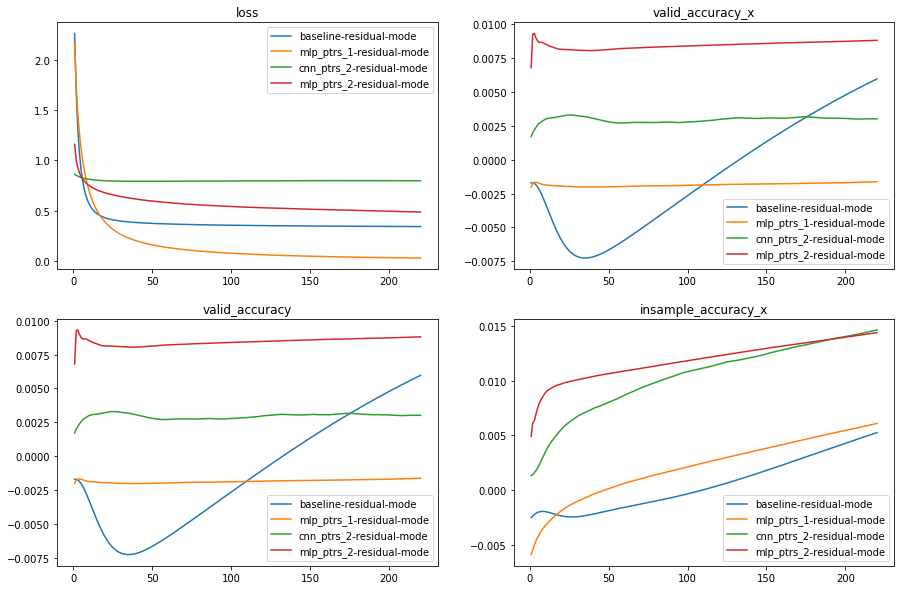

In [6]:
fig, aes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
for i in tags:
    tmp_ = out.loc[out['tag'] == i]
    for j in zip([0,0,1,1],[0,1,0,1]): 
        n = j[0] + j[1] * 2
        aes[j].plot(tmp_[['epoch_counter']], tmp_[types[n]], label = i)
        aes[j].legend()
        aes[j].set_title(types[n])

# Train on residual (with Adam)

In [7]:
# tag = 'baseline'
out = None
tags = [
    'baseline.with_adam-residual-mode', 
    'cnn_ptrs_1.with_adam-residual-mode', 
    'mlp_ptrs_1.with_adam-residual-mode', 
    'cnn_ptrs_2.with_adam-residual-mode', 
    'mlp_ptrs_2.with_adam-residual-mode'
]  # , 'cnn_ptrs_1-residual-mode'
types = ['loss', 'valid_accuracy', 'valid_accuracy_x', 'insample_accuracy_x']
for tag in tags:
    tmp = read_log(tag)
    tmp['tag'] = tag
    if out is None:
        out = tmp
    else:
        out = pd.concat([out, tmp])

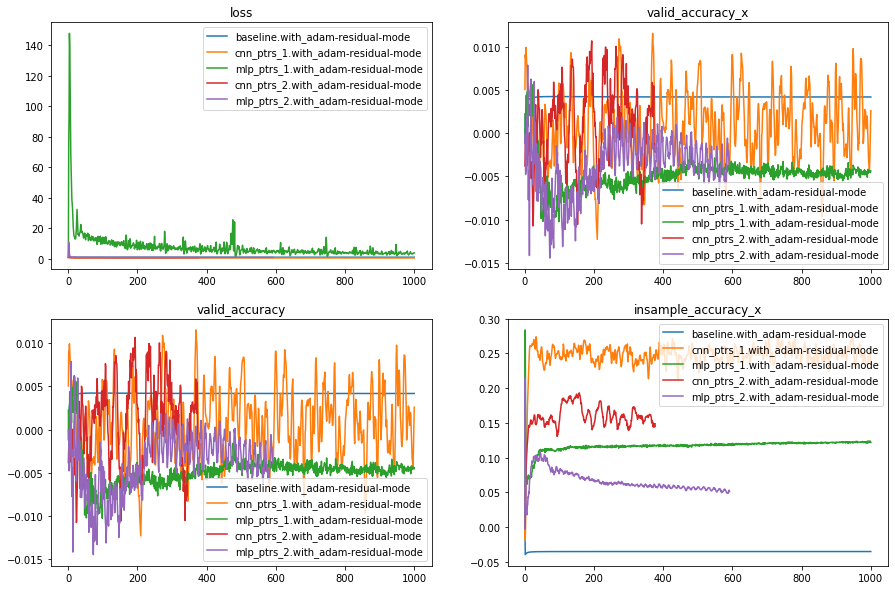

In [8]:
fig, aes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
for i in tags:
    tmp_ = out.loc[out['tag'] == i]
    for j in zip([0,0,1,1],[0,1,0,1]): 
        n = j[0] + j[1] * 2
        aes[j].plot(tmp_[['epoch_counter']], tmp_[types[n]], label = i)
        aes[j].legend()
        aes[j].set_title(types[n])

# Train on residual (fixed wrong loss)

In [9]:
# tag = 'baseline'
out = None
tags = [
    'baseline.with_adam_fixed_loss-residual-mode', 
    'cnn_ptrs_1.with_adam_fixed_loss-residual-mode', 
    'mlp_ptrs_1.with_adam_fixed_loss-residual-mode', 
    'cnn_ptrs_2.with_adam_fixed_loss-residual-mode', 
    'mlp_ptrs_2.with_adam_fixed_loss-residual-mode'
]  # , 'cnn_ptrs_1-residual-mode'
types = ['loss', 'loss_fixed', 'valid_accuracy_x', 'insample_accuracy_x']
for tag in tags:
    tmp = read_log(tag, fixed = 2)
    tmp['tag'] = tag
    if out is None:
        out = tmp
    else:
        out = pd.concat([out, tmp])

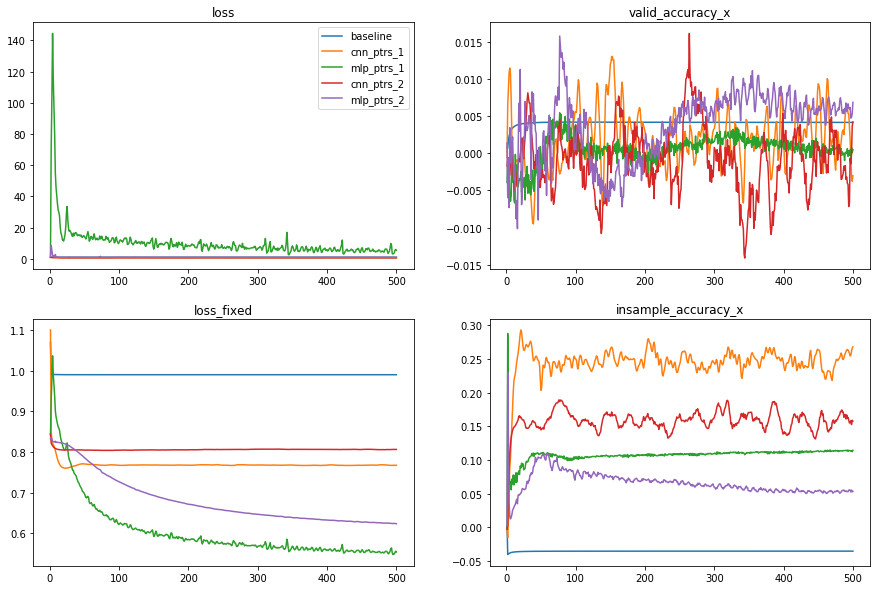

In [10]:
fig, aes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

for i in tags:
    tmp_ = out.loc[out['tag'] == i]
    show = 0
    for j in zip([0,0,1,1],[0,1,0,1]): 
        n = j[0] + j[1] * 2
        aes[j].plot(tmp_[['epoch_counter']], tmp_[types[n]], label = re.sub('.with_adam_fixed_loss-residual-mode', '', i))
        if show == 0:
            aes[j].legend()
            show = 1
        aes[j].set_title(types[n])

# Train on residual (universal normalization)

In [18]:
out = None
tags = [
    'baseline.with_adam_and_universal_normalizer-residual-mode', 
    'cnn_ptrs_1.with_adam_and_universal_normalizer-residual-mode', 
    'mlp_ptrs_1.with_adam_and_universal_normalizer-residual-mode', 
    'cnn_ptrs_2.with_adam_and_universal_normalizer-residual-mode', 
    'mlp_ptrs_2.with_adam_and_universal_normalizer-residual-mode'
]  # , 'cnn_ptrs_1-residual-mode'
types = ['loss', 'loss_valid', 'valid_accuracy_x', 'insample_accuracy_x']
for tag in tags:
    tmp = read_log(tag, fixed = 3)
    tmp['tag'] = tag
    if out is None:
        out = tmp
    else:
        out = pd.concat([out, tmp])

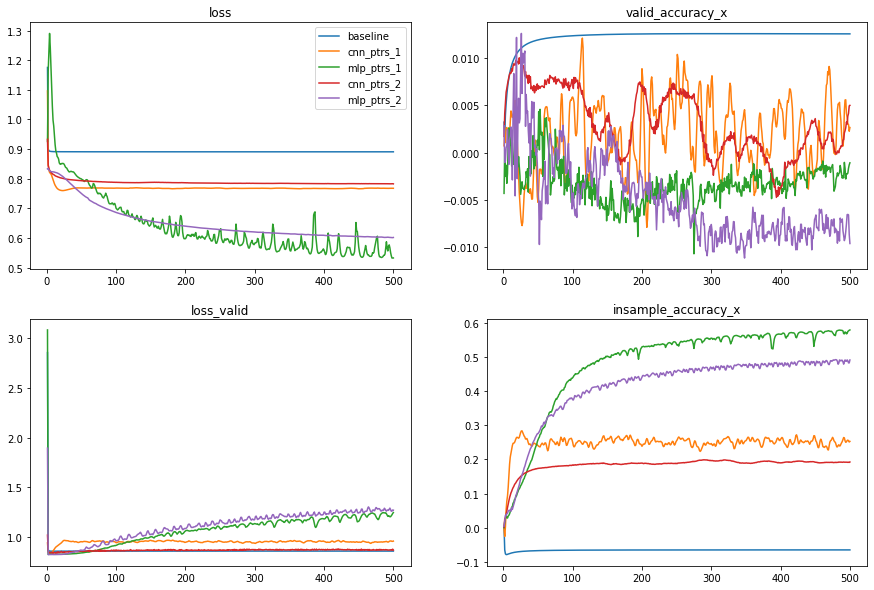

In [19]:
fig, aes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

for i in tags:
    tmp_ = out.loc[out['tag'] == i]
    show = 0
    for j in zip([0,0,1,1],[0,1,0,1]): 
        n = j[0] + j[1] * 2
        aes[j].plot(tmp_[['epoch_counter']], tmp_[types[n]], label = re.sub('.with_adam_and_universal_normalizer-residual-mode', '', i))
        if show == 0:
            aes[j].legend()
            show = 1
        aes[j].set_title(types[n])